In [ ]:
#initialize
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision 
import torchvision.transforms as transforms 
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
 
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
 
#hyperparameters
num_classes = 10
in_channel = 1
learning_rate = 0.001
batch_size = 128
num_epochs = 10

In [ ]:
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#load train_data from csv

csv_dataset1_train_alice1 ='/content/gdrive/MyDrive/dataset1/AIcomm_project_2_train_alice_1.csv'
csv_dataset1_train_john1 ='/content/gdrive/MyDrive/dataset1/AIcomm_project_2_train_john_1.csv'
csv_dataset1_train_peter1 ='/content/gdrive/MyDrive/dataset1/AIcomm_project_2_train_peter_1.csv'

cols_dataset1_train_alice1 = list(pd.read_csv(csv_dataset1_train_alice1, nrows =1))
cols_dataset1_train_john1 = list(pd.read_csv(csv_dataset1_train_john1, nrows =1))
cols_dataset1_train_peter1 = list(pd.read_csv(csv_dataset1_train_peter1, nrows =1))

csv_features_alice1 = pd.read_csv(csv_dataset1_train_alice1, index_col = 0, usecols =[i for i in cols_dataset1_train_alice1 if i != 'label'])
csv_label_alice1 = pd.read_csv(csv_dataset1_train_alice1, index_col = 0, usecols=[0, 1])
csv_features_john1 = pd.read_csv(csv_dataset1_train_john1, index_col = 0, usecols =[i for i in cols_dataset1_train_john1 if i != 'label'])
csv_label_john1 = pd.read_csv(csv_dataset1_train_john1, index_col = 0, usecols=[0, 1])
csv_features_peter1 = pd.read_csv(csv_dataset1_train_peter1, index_col = 0, usecols =[i for i in cols_dataset1_train_peter1 if i != 'label'])
csv_label_peter1 = pd.read_csv(csv_dataset1_train_peter1, index_col = 0, usecols=[0, 1])

#pd.concat for CL dataset
csv_features_1 = pd.concat([csv_features_alice1, csv_features_john1,csv_features_peter1])
csv_label_1 = pd.concat([csv_label_alice1, csv_label_john1,csv_label_peter1])


In [ ]:
# train , validation 데이터 분리
scaler = StandardScaler()

train_features_1, valid_features_1, train_labels_1, valid_labels_1 = train_test_split(csv_features_1.values, csv_label_1.values, train_size = 0.8)

train_features_1 = scaler.fit_transform(train_features_1)
valid_features_1 = scaler.transform(valid_features_1)

train_features_1 = train_features_1.reshape(-1, 1, 28, 28)
valid_features_1 = valid_features_1.reshape(-1, 1, 28, 28)

#alice
train_features_alice1, valid_features_alice1, train_labels_alice1, valid_labels_alice1 = train_test_split(csv_features_alice1.values, csv_label_alice1.values, train_size = 0.8)

train_features_alice1 = scaler.fit_transform(train_features_alice1)
valid_features_alice1 = scaler.transform(valid_features_alice1)

train_features_alice1 = train_features_alice1.reshape(-1, 1, 28, 28)
valid_features_alice1 = valid_features_alice1.reshape(-1, 1, 28, 28)

#john
train_features_john1, valid_features_john1, train_labels_john1, valid_labels_john1 = train_test_split(csv_features_john1.values, csv_label_john1.values, train_size = 0.8)

train_features_john1 = scaler.fit_transform(train_features_john1)
valid_features_john1 = scaler.transform(valid_features_john1)

train_features_john1 = train_features_john1.reshape(-1, 1, 28, 28)
valid_features_john1 = valid_features_john1.reshape(-1, 1, 28, 28)



#peter
train_features_peter1, valid_features_peter1, train_labels_peter1, valid_labels_peter1 = train_test_split(csv_features_peter1.values, csv_label_peter1.values, train_size = 0.8)

train_features_peter1 = scaler.fit_transform(train_features_peter1)
valid_features_peter1 = scaler.transform(valid_features_peter1)

train_features_peter1 = train_features_peter1.reshape(-1, 1, 28, 28)
valid_features_peter1 = valid_features_peter1.reshape(-1, 1, 28, 28)

In [ ]:
class DataSet(Dataset):
  def __init__(self, train_x, train_y, transform=transforms.ToTensor):
    self.X = train_x
    self.y = train_y
    self.transform = transform      

  def __getitem__(self, item):
    x_t = torch.Tensor(self.X[item])
    y_t = self.y[item]
    return (x_t, int(y_t))
  def __len__(self):
    return len(self.X)

In [ ]:
dataset_train_1 = DataSet(train_features_1, train_labels_1)
dataset_valid_1 = DataSet(valid_features_1, valid_labels_1)

train_loader_1 = DataLoader(dataset = dataset_train_1, batch_size = batch_size, shuffle = True)
valid_loader_1 = DataLoader(dataset = dataset_valid_1, batch_size = batch_size, shuffle = True)

#alice
dataset_train_alice1 = DataSet(train_features_alice1, train_labels_alice1)
dataset_valid_alice1 = DataSet(valid_features_alice1, valid_labels_alice1)

train_loader_alice1 = DataLoader(dataset = dataset_train_alice1, batch_size = batch_size, shuffle = True)
valid_loader_alice1 = DataLoader(dataset = dataset_valid_alice1, batch_size = batch_size, shuffle = True)

#john
dataset_train_john1 = DataSet(train_features_john1, train_labels_john1)
dataset_valid_john1 = DataSet(valid_features_john1, valid_labels_john1)

train_loader_john1 = DataLoader(dataset = dataset_train_john1, batch_size = batch_size, shuffle = True)
valid_loader_john1 = DataLoader(dataset = dataset_valid_john1, batch_size = batch_size, shuffle = True)

#peter
dataset_train_peter1 = DataSet(train_features_peter1, train_labels_peter1)
dataset_valid_peter1 = DataSet(valid_features_peter1, valid_labels_peter1)

train_loader_peter1 = DataLoader(dataset = dataset_train_peter1, batch_size = batch_size, shuffle = True)
valid_loader_peter1 = DataLoader(dataset = dataset_valid_peter1, batch_size = batch_size, shuffle = True)

In [ ]:
#load test_data from csv

csv_test ='/content/gdrive/MyDrive/AIcomm_project_2_test.csv'

cols = list(pd.read_csv(csv_test, nrows =1))
scaler = StandardScaler()

csv_test_features = pd.read_csv(csv_test, index_col = 0, usecols =[i for i in cols if i != 'label'])
csv_test_labels = pd.read_csv(csv_test, index_col = 0, usecols=[0, 1])

test_features = csv_test_features.values
test_features = scaler.fit_transform(test_features)

test_labels = csv_test_labels.values

test_features = test_features.reshape(-1,1,28,28)

dataset_test = DataSet(test_features, test_labels)

test_loader = DataLoader(dataset = dataset_test, batch_size = batch_size, shuffle = False)

In [ ]:
from torchvision import models

resnet18 = models.resnet18(pretrained=True)

In [ ]:
class ResNet(nn.Module):
  def __init__(self, in_channels, resnet18, num_classes):
    super(ResNet, self).__init__()
    self.model = resnet18
    self.model.conv1 = nn.Conv2d(1, 64, 3)
    self.model.fc = nn.Linear(512, num_classes)

  def forward(self, x):
    x = self.model(x)

    return x

In [ ]:
model = ResNet(in_channel,resnet18,num_classes).to(device)

#Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=0.1)

In [ ]:
model

# CL 데이터 학습

Epoch [1/10], Loss: 0.3823, Train Accuracy: 83.59%, Valid Accuracy: 85.94%
Epoch [2/10], Loss: 0.3012, Train Accuracy: 95.31%, Valid Accuracy: 89.06%
Epoch [3/10], Loss: 0.2482, Train Accuracy: 96.88%, Valid Accuracy: 88.28%
Epoch [4/10], Loss: 0.2842, Train Accuracy: 92.19%, Valid Accuracy: 89.84%
Epoch [5/10], Loss: 0.2297, Train Accuracy: 95.31%, Valid Accuracy: 88.28%
Epoch [6/10], Loss: 0.1571, Train Accuracy: 100.00%, Valid Accuracy: 92.19%
Epoch [7/10], Loss: 0.1406, Train Accuracy: 96.88%, Valid Accuracy: 83.59%
Epoch [8/10], Loss: 0.2354, Train Accuracy: 97.66%, Valid Accuracy: 93.75%
Epoch [9/10], Loss: 0.1176, Train Accuracy: 98.44%, Valid Accuracy: 91.41%
Epoch [10/10], Loss: 0.0595, Train Accuracy: 98.44%, Valid Accuracy: 89.06%


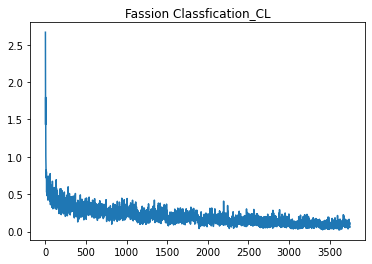

In [ ]:
#CL Train

total_step = len(train_loader_1)
loss_list = []
best_acc = 0

for epoch in range(num_epochs):
  for i, (data, labels) in enumerate(train_loader_1):


    # Assign Tensors to Configured Device
    images, labels = Variable(data.float()).to(device), Variable(labels.type(torch.LongTensor)).to(device)

    # Forward Propagation
    outputs = model(images)

    # Get Loss, Compute Gradient, Update Parameters
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Append loss to plot graph
    loss_list.append(loss)

    # Print Loss to track Training process
    if (i+1)==len(train_loader_1):
      
      train_acc = 0
      train_image, train_label = next(iter(train_loader_1))
      train_image, train_label = Variable(train_image.float()).to(device), Variable(train_label.type(torch.LongTensor)).to(device)

      _, train_predicted = torch.max(model(train_image.to(device)).data, 1)

      for (pred, ans) in zip(train_predicted, train_label):
        if pred == ans:
          train_acc += 1
      train_acc = train_acc / len(train_predicted)

      valid_acc = 0
      valid_image, valid_label = next(iter(valid_loader_1))
      valid_image, valid_label = Variable(valid_image.float()).to(device), Variable(valid_label.type(torch.LongTensor)).to(device)

      _, valid_predicted = torch.max(model(valid_image.to(device)).data, 1)
      
      for (pred, ans) in zip(valid_predicted, valid_label):
        if pred == ans:
          valid_acc += 1
      valid_acc = valid_acc / len(valid_predicted)

      if best_acc < valid_acc:
          best_acc = valid_acc
          torch.save(model.state_dict(), 'Fassion_Classification_CL.pth')

      print('Epoch [{}/{}], Loss: {:.4f}, Train Accuracy: {:.2f}%, Valid Accuracy: {:.2f}%'.format(epoch+1,num_epochs, loss.item(), train_acc*100, valid_acc*100))

plt.plot(loss_list)
plt.title("Fassion Classfication_CL")
plt.show()

In [ ]:
#CL Test

model = ResNet(in_channel,resnet18,num_classes).to(device)
#Loss, Optimizer, LR scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=0.1)

#load trained model and evaluate model on test data
test_model = ResNet(1,resnet18,10).to(device)
test_model.load_state_dict(torch.load('/content/Fassion_Classification_CL.pth'))
test_model.eval()
with torch.no_grad():
  correct = 0
  for image, label in test_loader:
    image = image.to(device)
    label = label.to(device)
    out = model(image)
    _, pred = torch.max(out.data, 1)
    correct += (pred == label).sum().item()
  print("Accuracy of the network on the {} test images: {}%".format(len(test_loader)*batch_size, 100 * correct / (len(test_loader) * batch_size)))

Accuracy of the network on the 10112 test images: 90.07120253164557%


# **FL 데이터 학습**

In [ ]:
import copy
import torch.optim as optim

In [ ]:
#FL dataloader
user_id = ['Alice','John', 'Peter']

train_loaders = [train_loader_alice1, train_loader_john1,train_loader_peter1]
valid_loaders = [valid_loader_alice1, valid_loader_john1,valid_loader_peter1]

In [ ]:
global_model = ResNet(in_channel,resnet18,num_classes).to(device)

global_weights = global_model.state_dict()

criterion = nn.CrossEntropyLoss()

In [ ]:
def train_test(global_model, train_loaders, user_id, epochs=10, interval=100):
    for epoch in range(epochs):
        local_weights = []
        
        global_model.train()
        
        models = [copy.deepcopy(global_model), copy.deepcopy(global_model), copy.deepcopy(global_model),]
        
        for idx in range(len(user_id)):
            w = local_update(models[idx], train_loaders[idx], user_id[idx], epoch, interval)
            local_weights.append(copy.deepcopy(w))
            
        global_weights = average_weights(local_weights)
        global_model.load_state_dict(global_weights)
    
        test(global_model, test_loader)
    
    return global_model

In [ ]:
def local_update(model, train_loader, user_id, epoch, interval):
    print("User ID : %s" %user_id)
    model.train()
    
    optimizer = optim.Adam(model.parameters(), lr = 1e-3)
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))            
        
    return model.state_dict()

In [ ]:
def average_weights(w):
    w_avg = copy.deepcopy(w[0])
    for k in w_avg.keys():
        for i in range(1, len(w)):
            w_avg[k] += w[i][k]
        w_avg[k] = torch.div(w_avg[k], len(w))
    return w_avg

In [ ]:
def test(global_model, test_loader):
    global_model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, label in test_loader:
            data, label = data.to(device), label.to(device)
            output = global_model(data)
            test_loss += criterion(output, label).item()
            pred = output.argmax(dim=1, keepdim = True)
            correct += pred.eq(label.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format
          (test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
global_model = train_test(global_model, train_loaders, user_id)

User ID : Alice
Train Epoch: 0 [0/16000 (0%)]	Loss: 2.553295
Train Epoch: 0 [12800/16000 (80%)]	Loss: 0.376428
User ID : John
Train Epoch: 0 [0/16000 (0%)]	Loss: 2.527211
Train Epoch: 0 [12800/16000 (80%)]	Loss: 0.472635
User ID : Peter
Train Epoch: 0 [0/16000 (0%)]	Loss: 2.564293
Train Epoch: 0 [12800/16000 (80%)]	Loss: 0.491257

Test set: Average loss: 0.0190, Accuracy: 2232/10000 (22.32%)

User ID : Alice
Train Epoch: 1 [0/16000 (0%)]	Loss: 0.688353
Train Epoch: 1 [12800/16000 (80%)]	Loss: 0.545813
User ID : John
Train Epoch: 1 [0/16000 (0%)]	Loss: 0.789457
Train Epoch: 1 [12800/16000 (80%)]	Loss: 0.334010
User ID : Peter
Train Epoch: 1 [0/16000 (0%)]	Loss: 0.820669
Train Epoch: 1 [12800/16000 (80%)]	Loss: 0.306650

Test set: Average loss: 0.0031, Accuracy: 8740/10000 (87.40%)

User ID : Alice
Train Epoch: 2 [0/16000 (0%)]	Loss: 0.499333
Train Epoch: 2 [12800/16000 (80%)]	Loss: 0.273438
User ID : John
Train Epoch: 2 [0/16000 (0%)]	Loss: 0.272757
Train Epoch: 2 [12800/16000 (80%)]	Lo

# **개별 데이터 학습**

Epoch [1/10], Loss: 0.2488, Train Accuracy: 87.50%, Valid Accuracy: 82.81%
Epoch [2/10], Loss: 0.3257, Train Accuracy: 90.62%, Valid Accuracy: 87.50%
Epoch [3/10], Loss: 0.2306, Train Accuracy: 90.62%, Valid Accuracy: 84.38%
Epoch [4/10], Loss: 0.2833, Train Accuracy: 95.31%, Valid Accuracy: 83.59%
Epoch [5/10], Loss: 0.1372, Train Accuracy: 99.22%, Valid Accuracy: 92.97%
Epoch [6/10], Loss: 0.2690, Train Accuracy: 96.09%, Valid Accuracy: 79.69%
Epoch [7/10], Loss: 0.1854, Train Accuracy: 96.09%, Valid Accuracy: 78.91%
Epoch [8/10], Loss: 0.1136, Train Accuracy: 97.66%, Valid Accuracy: 85.16%
Epoch [9/10], Loss: 0.0656, Train Accuracy: 96.88%, Valid Accuracy: 86.72%
Epoch [10/10], Loss: 0.0878, Train Accuracy: 97.66%, Valid Accuracy: 84.38%


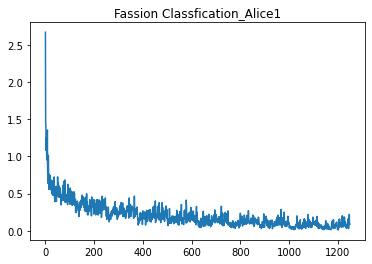

Accuracy of the network on the 10112 test images: 86.73852848101266%


In [ ]:
#개별 데이터 학습 alice train&test

total_step = len(train_loader_alice1)
loss_list = []
best_acc = 0

for epoch in range(num_epochs):
  for i, (data, labels) in enumerate(train_loader_alice1):


    # Assign Tensors to Configured Device
    images, labels = Variable(data.float()).to(device), Variable(labels.type(torch.LongTensor)).to(device)

    # Forward Propagation
    outputs = model(images)

    # Get Loss, Compute Gradient, Update Parameters
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Append loss to plot graph
    loss_list.append(loss)

    # Print Loss to track Training process
    if (i+1)==len(train_loader_alice1):
      
      train_acc = 0
      train_image, train_label = next(iter(train_loader_alice1))
      train_image, train_label = Variable(train_image.float()).to(device), Variable(train_label.type(torch.LongTensor)).to(device)

      _, train_predicted = torch.max(model(train_image.to(device)).data, 1)

      for (pred, ans) in zip(train_predicted, train_label):
        if pred == ans:
          train_acc += 1
      train_acc = train_acc / len(train_predicted)

      valid_acc = 0
      valid_image, valid_label = next(iter(valid_loader_alice1))
      valid_image, valid_label = Variable(valid_image.float()).to(device), Variable(valid_label.type(torch.LongTensor)).to(device)

      _, valid_predicted = torch.max(model(valid_image.to(device)).data, 1)
      
      for (pred, ans) in zip(valid_predicted, valid_label):
        if pred == ans:
          valid_acc += 1
      valid_acc = valid_acc / len(valid_predicted)

      if best_acc < valid_acc:
          best_acc = valid_acc
          torch.save(model.state_dict(), 'Fassion_Classification_Alice1.pth')

      print('Epoch [{}/{}], Loss: {:.4f}, Train Accuracy: {:.2f}%, Valid Accuracy: {:.2f}%'.format(epoch+1,num_epochs, loss.item(), train_acc*100, valid_acc*100))

plt.plot(loss_list)
plt.title("Fassion Classfication_Alice1")
plt.show()

#CL Test

model = ResNet(in_channel,resnet18,num_classes).to(device)
#Loss, Optimizer, LR scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=0.1)

#load trained model and evaluate model on test data
test_model = ResNet(1,resnet18,10).to(device)
test_model.load_state_dict(torch.load('/content/Fassion_Classification_Alice1.pth'))
test_model.eval()
with torch.no_grad():
  correct = 0
  for image, label in test_loader:
    image = image.to(device)
    label = label.to(device)
    out = model(image)
    _, pred = torch.max(out.data, 1)
    correct += (pred == label).sum().item()
  print("Accuracy of the network on the {} test images: {}%".format(len(test_loader)*batch_size, 100 * correct / (len(test_loader) * batch_size)))

Epoch [1/10], Loss: 0.3772, Train Accuracy: 85.94%, Valid Accuracy: 88.28%
Epoch [2/10], Loss: 0.2642, Train Accuracy: 92.97%, Valid Accuracy: 85.16%
Epoch [3/10], Loss: 0.2224, Train Accuracy: 92.97%, Valid Accuracy: 89.06%
Epoch [4/10], Loss: 0.1614, Train Accuracy: 92.97%, Valid Accuracy: 86.72%
Epoch [5/10], Loss: 0.1965, Train Accuracy: 97.66%, Valid Accuracy: 89.84%
Epoch [6/10], Loss: 0.0768, Train Accuracy: 97.66%, Valid Accuracy: 85.94%
Epoch [7/10], Loss: 0.1618, Train Accuracy: 99.22%, Valid Accuracy: 90.62%
Epoch [8/10], Loss: 0.1918, Train Accuracy: 97.66%, Valid Accuracy: 89.06%
Epoch [9/10], Loss: 0.1801, Train Accuracy: 94.53%, Valid Accuracy: 90.62%
Epoch [10/10], Loss: 0.0420, Train Accuracy: 99.22%, Valid Accuracy: 89.06%


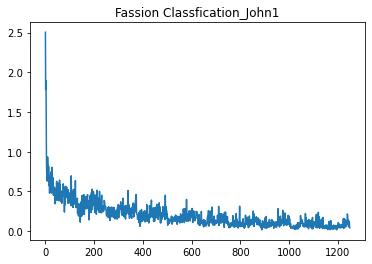

Accuracy of the network on the 10112 test images: 85.80893987341773%


In [ ]:
#개별 데이터 학습 john train&test

total_step = len(train_loader_john1)
loss_list = []
best_acc = 0

for epoch in range(num_epochs):
  for i, (data, labels) in enumerate(train_loader_john1):


    # Assign Tensors to Configured Device
    images, labels = Variable(data.float()).to(device), Variable(labels.type(torch.LongTensor)).to(device)

    # Forward Propagation
    outputs = model(images)

    # Get Loss, Compute Gradient, Update Parameters
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Append loss to plot graph
    loss_list.append(loss)

    # Print Loss to track Training process
    if (i+1)==len(train_loader_john1):
      
      train_acc = 0
      train_image, train_label = next(iter(train_loader_john1))
      train_image, train_label = Variable(train_image.float()).to(device), Variable(train_label.type(torch.LongTensor)).to(device)

      _, train_predicted = torch.max(model(train_image.to(device)).data, 1)

      for (pred, ans) in zip(train_predicted, train_label):
        if pred == ans:
          train_acc += 1
      train_acc = train_acc / len(train_predicted)

      valid_acc = 0
      valid_image, valid_label = next(iter(valid_loader_john1))
      valid_image, valid_label = Variable(valid_image.float()).to(device), Variable(valid_label.type(torch.LongTensor)).to(device)

      _, valid_predicted = torch.max(model(valid_image.to(device)).data, 1)
      
      for (pred, ans) in zip(valid_predicted, valid_label):
        if pred == ans:
          valid_acc += 1
      valid_acc = valid_acc / len(valid_predicted)

      if best_acc < valid_acc:
          best_acc = valid_acc
          torch.save(model.state_dict(), 'Fassion_Classification_John1.pth')

      print('Epoch [{}/{}], Loss: {:.4f}, Train Accuracy: {:.2f}%, Valid Accuracy: {:.2f}%'.format(epoch+1,num_epochs, loss.item(), train_acc*100, valid_acc*100))

plt.plot(loss_list)
plt.title("Fassion Classfication_John1")
plt.show()

#CL Test

model = ResNet(in_channel,resnet18,num_classes).to(device)
#Loss, Optimizer, LR scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=0.1)

#load trained model and evaluate model on test data
test_model = ResNet(1,resnet18,10).to(device)
test_model.load_state_dict(torch.load('/content/Fassion_Classification_John1.pth'))
test_model.eval()
with torch.no_grad():
  correct = 0
  for image, label in test_loader:
    image = image.to(device)
    label = label.to(device)
    out = model(image)
    _, pred = torch.max(out.data, 1)
    correct += (pred == label).sum().item()
  print("Accuracy of the network on the {} test images: {}%".format(len(test_loader)*batch_size, 100 * correct / (len(test_loader) * batch_size)))

Epoch [1/10], Loss: 0.3323, Train Accuracy: 89.06%, Valid Accuracy: 78.91%
Epoch [2/10], Loss: 0.3876, Train Accuracy: 92.19%, Valid Accuracy: 86.72%
Epoch [3/10], Loss: 0.3113, Train Accuracy: 92.19%, Valid Accuracy: 84.38%
Epoch [4/10], Loss: 0.2033, Train Accuracy: 94.53%, Valid Accuracy: 85.16%
Epoch [5/10], Loss: 0.1662, Train Accuracy: 92.97%, Valid Accuracy: 85.94%
Epoch [6/10], Loss: 0.2007, Train Accuracy: 97.66%, Valid Accuracy: 89.06%
Epoch [7/10], Loss: 0.1497, Train Accuracy: 97.66%, Valid Accuracy: 89.06%
Epoch [8/10], Loss: 0.1008, Train Accuracy: 96.88%, Valid Accuracy: 91.41%
Epoch [9/10], Loss: 0.1081, Train Accuracy: 98.44%, Valid Accuracy: 83.59%
Epoch [10/10], Loss: 0.0711, Train Accuracy: 98.44%, Valid Accuracy: 88.28%


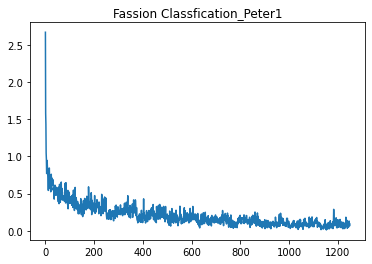

Accuracy of the network on the 10112 test images: 86.82753164556962%


In [ ]:
#개별 데이터 학습 peter train&test

total_step = len(train_loader_peter1)
loss_list = []
best_acc = 0

for epoch in range(num_epochs):
  for i, (data, labels) in enumerate(train_loader_peter1):


    # Assign Tensors to Configured Device
    images, labels = Variable(data.float()).to(device), Variable(labels.type(torch.LongTensor)).to(device)

    # Forward Propagation
    outputs = model(images)

    # Get Loss, Compute Gradient, Update Parameters
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Append loss to plot graph
    loss_list.append(loss)

    # Print Loss to track Training process
    if (i+1)==len(train_loader_peter1):
      
      train_acc = 0
      train_image, train_label = next(iter(train_loader_peter1))
      train_image, train_label = Variable(train_image.float()).to(device), Variable(train_label.type(torch.LongTensor)).to(device)

      _, train_predicted = torch.max(model(train_image.to(device)).data, 1)

      for (pred, ans) in zip(train_predicted, train_label):
        if pred == ans:
          train_acc += 1
      train_acc = train_acc / len(train_predicted)

      valid_acc = 0
      valid_image, valid_label = next(iter(valid_loader_peter1))
      valid_image, valid_label = Variable(valid_image.float()).to(device), Variable(valid_label.type(torch.LongTensor)).to(device)

      _, valid_predicted = torch.max(model(valid_image.to(device)).data, 1)
      
      for (pred, ans) in zip(valid_predicted, valid_label):
        if pred == ans:
          valid_acc += 1
      valid_acc = valid_acc / len(valid_predicted)

      if best_acc < valid_acc:
          best_acc = valid_acc
          torch.save(model.state_dict(), 'Fassion_Classification_Peter1.pth')

      print('Epoch [{}/{}], Loss: {:.4f}, Train Accuracy: {:.2f}%, Valid Accuracy: {:.2f}%'.format(epoch+1,num_epochs, loss.item(), train_acc*100, valid_acc*100))

plt.plot(loss_list)
plt.title("Fassion Classfication_Peter1")
plt.show()

#CL Test

model = ResNet(in_channel,resnet18,num_classes).to(device)
#Loss, Optimizer, LR scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=0.1)

#load trained model and evaluate model on test data
test_model = ResNet(1,resnet18,10).to(device)
test_model.load_state_dict(torch.load('/content/Fassion_Classification_Peter1.pth'))
test_model.eval()
with torch.no_grad():
  correct = 0
  for image, label in test_loader:
    image = image.to(device)
    label = label.to(device)
    out = model(image)
    _, pred = torch.max(out.data, 1)
    correct += (pred == label).sum().item()
  print("Accuracy of the network on the {} test images: {}%".format(len(test_loader)*batch_size, 100 * correct / (len(test_loader) * batch_size)))